In [14]:
import pandas as pd
import numpy as np
from qubitPack.tool_box import IOTools
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import os

os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin/latex"
plt.style.use(["science", "nature", "light"])


In [149]:
defect_df = IOTools(cwd=".", excel_file="defect_2021-11-18").read_excel()

triplet_df = defect_df.loc[(defect_df["mag"] == 2), :]

good_triplet_df = defect_df.loc[(defect_df["mag"] == 2) & (defect_df["level_cbm"] != "None")
                                    & (defect_df["level_vbm"] != "None"), :]

qubit_candidate_df = good_triplet_df.loc[(good_triplet_df["up_tran_en"] >= 0.5) | (good_triplet_df["dn_tran_en"]
                                                                                       >= 0.5), :]

In [186]:
grouping = ["prototype", "pmg_spg", "pmg_pg", "uid", "reduced_site_sym", "reduced_site_specie",]
grouping.extend(["defect_type", "defect_name", "charge", "mag"])

# Statistics

## Unique defect systems

In [84]:
defect_name = defect_df.groupby(["host_taskid", "defect_name"]).defect_name
display(defect_name.unique()[:10])
tot_unique_defect_sys = defect_name.unique()[:].count()
tot_unique_defect_sys

host_taskid  defect_name  
4            as_1_B_on_N        [as_1_B_on_N]
             as_1_N_on_B        [as_1_N_on_B]
             vac_1_B                [vac_1_B]
             vac_2_N                [vac_2_N]
29           as_1_Pd_on_S      [as_1_Pd_on_S]
             as_1_S_on_Pd      [as_1_S_on_Pd]
             vac_1_Pd              [vac_1_Pd]
             vac_2_S                [vac_2_S]
40           as_1_Cl_on_Mg    [as_1_Cl_on_Mg]
             as_1_Mg_on_Cl    [as_1_Mg_on_Cl]
Name: defect_name, dtype: object

741

## Calculated hosts

In [89]:
host = defect_df.groupby(["host_taskid"]).host_taskid
display(host.unique()[:10])
tot_host = host.unique()[:].count()
tot_host

host_taskid
4        [4]
29      [29]
40      [40]
46      [46]
55      [55]
57      [57]
63      [63]
66      [66]
82      [82]
105    [105]
Name: host_taskid, dtype: object

243

## Total number of calculated defect systems

In [187]:
grouping.extend(["level_vbm", "level_cbm", "level_gap", "level_cat"])
grouping.extend(["up_tran_en", "dn_tran_en", 
                    "up_tran_wavelength", "dn_tran_wavelength"])
defect_gp = defect_df.groupby(grouping).agg({"task_id": {"count", "unique"}})
defect_gp
IOTools(cwd=".", pandas_df=defect_gp).to_excel("defect_gp", index=True)

## Bandedge-level hypothesis and transition wavelength

In [81]:
#### grouping = ["level_cat", "prototype", "pmg_spg", "pmg_pg", "uid", "reduced_site_sym", "reduced_site_specie",]
# grouping.extend(["defect_type", "defect_name", "charge", "up_tran_wavelength", "dn_tran_wavelength"])

# df = qubit_candidate_df.groupby(grouping).agg({"task_id": ["unique", "count"]})
for x in ["1", "2", "3", "4", "2'", "3'"]:
    df = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == x, :]
    df = df.loc[:, ["prototype", "host_taskid", "up_tran_en", "dn_tran_en", 
                    "up_tran_wavelength", "dn_tran_wavelength", "task_id"]]
    df.sort_values(["up_tran_wavelength", "dn_tran_wavelength"], inplace=True)
    IOTools(cwd=".", pandas_df=df).to_excel("qubit_tran_cat{}".format(x), index=True)

# Data in Main Text

# Triplet

In [159]:
table_path = "/Users/jeng-yuantsai/Research/project/Scan2dDefect/manuscript/tables"

## Figure 1'

In [132]:
db = get_db("Scan2dMat", "calc_data", port=12347)
host_collection = db.collection

In [141]:
host_taskid = 4
host = host_collection.find_one({"task_id": host_taskid})
st = host["output"]["structure"]
from pymatgen import Structure
Structure.from_dict(st).to("poscar", "host_structure/{}.vasp".format(host_taskid))

## Table 1: Triplet in defect calculations

In [174]:
grouping.extend(["level_vbm", "level_cbm", "level_gap", "level_cat"])
df = triplet_df.groupby(grouping).agg({"host_taskid": ["unique"], "task_id": ["unique", "count"]})
df.task_id.sum()

unique    [2032914, 2046258]
count                    564
dtype: object

In [175]:
IOTools(cwd=table_path, pandas_df=df).to_excel("Table_1", index=True)

## Number 1: Fraction of triplet over total defect calculations

In [100]:
total_triplet = triplet_df.loc[:, "task_id"].count()
total_defect = defect_df.loc[:, "task_id"].count()
triplet_fraction = total_triplet/total_defect
display("Total triplet calc: {}, Total defect calc: {}, Fraction: {:.2%}".format(total_triplet, total_defect, triplet_fraction))

'Total triplet calc: 564, Total defect calc: 1487, Fraction: 37.93%'

## Number 2: Fraction of unique defect systems

In [99]:
defect_name = triplet_df.groupby(["host_taskid", "defect_name"]).defect_name.unique()
display(defect_name)
display("Tot triplet unique defect sys: {}, total unique defect sys: {}, Fraction: {:.2%}".format(defect_name.count(), tot_unique_defect_sys, defect_name.count()/tot_unique_defect_sys))

host_taskid  defect_name  
4            vac_1_B                [vac_1_B]
40           as_1_Cl_on_Mg    [as_1_Cl_on_Mg]
             vac_1_Mg              [vac_1_Mg]
46           as_1_Cl_on_Mg    [as_1_Cl_on_Mg]
             vac_1_Mg              [vac_1_Mg]
                                   ...       
2618         vac_1_In              [vac_1_In]
2643         as_1_Pb_on_Te    [as_1_Pb_on_Te]
             vac_1_Te              [vac_1_Te]
2646         as_1_Cl_on_Al    [as_1_Cl_on_Al]
             vac_1_Al              [vac_1_Al]
Name: defect_name, Length: 464, dtype: object

'Tot triplet unique defect sys: 464, total unique defect sys: 741, Fraction: 62.62%'

## Number 3: Fraction of hosts

In [133]:
triplet_host = triplet_df.groupby(["host_taskid",]).host_taskid.unique()
display("Tot triplet hosts: {}, Tot host calc:{}, Fraction: {:.2%}".format(triplet_host.count(), tot_host, triplet_host.count()/tot_host))

'Tot triplet hosts: 212, Tot host calc:243, Fraction: 87.24%'

## Table 2 Distribution of defect types and charged triplets

In [149]:
df = triplet_df.groupby(["defect_type", "charge"]).agg(dict(task_id=["count"]))
print(df["task_id"].sum())
df["frac"] = df.apply(lambda x: round(x/float(df["task_id"].sum()), 2))
df.to_clipboard()
display(df)

count    564
dtype: int64


task_id  frac
                     count      
defect_type charge              
antisite    -1         161  0.29
             0          96  0.17
             1          95  0.17
vacancy     -1          61  0.11
             0          95  0.17
             1          56  0.10

In [160]:
IOTools(cwd=table_path, pandas_df=df).to_excel("Table_2", index=True)

# Qubit candidate

## Table 3: Qubit candidate

In [182]:
grouping.extend(["level_vbm", "level_cbm", "level_gap", "level_cat"])
grouping.extend(["up_tran_en", "dn_tran_en", 
                    "up_tran_wavelength", "dn_tran_wavelength"])
df = qubit_candidate_df.groupby(grouping).agg({"host_taskid": ["unique"], "task_id": ["unique", "count"]})
df.task_id.sum()

unique    [565651, 571311]
count                  164
dtype: object

In [183]:
IOTools(cwd=table_path, pandas_df=df).to_excel("Table_3", index=True)

## Number 4: Fraction of qubit over total defect calculations

In [123]:
total_qubit = qubit_candidate_df.loc[:, "task_id"].count()
total_defect = defect_df.loc[:, "task_id"].count()
qubit_fraction = total_qubit/total_defect
display("Total qubit calc: {}, Total defect calc: {}, Fraction: {:.2%}".format(total_qubit, total_defect, qubit_fraction))

'Total qubit calc: 164, Total defect calc: 1487, Fraction: 11.03%'

## Number 5: Fraction of unique defect systems

In [125]:
defect_name = qubit_candidate_df.groupby(["host_taskid", "defect_name"]).defect_name.unique()
display(defect_name)
display("Tot qubit unique defect sys: {}, total unique defect sys: {}, Fraction: {:.2%}".format(defect_name.count(), tot_unique_defect_sys, defect_name.count()/tot_unique_defect_sys))

host_taskid  defect_name  
4            vac_1_B                [vac_1_B]
46           as_1_Cl_on_Mg    [as_1_Cl_on_Mg]
55           as_1_Cl_on_Zn    [as_1_Cl_on_Zn]
66           as_1_Sn_on_S      [as_1_Sn_on_S]
106          as_1_Sn_on_Cl    [as_1_Sn_on_Cl]
                                   ...       
2592         as_1_Se_on_In    [as_1_Se_on_In]
2618         as_1_In_on_S      [as_1_In_on_S]
             as_1_S_on_In      [as_1_S_on_In]
2643         as_1_Pb_on_Te    [as_1_Pb_on_Te]
2646         as_1_Cl_on_Al    [as_1_Cl_on_Al]
Name: defect_name, Length: 146, dtype: object

'Tot qubit unique defect sys: 146, total unique defect sys: 741, Fraction: 19.70%'

## Number 6: Fraction of hosts

In [127]:
qubit_host_df = qubit_candidate_df.groupby(["host_taskid",]).host_taskid.unique()
display("Tot qubit hosts: {}, Tot host calc:{}, Fraction: {:.2%}".format(qubit_host_df.count(), tot_host, qubit_host_df.count()/tot_host))

'Tot qubit hosts: 122, Tot host calc:243, Fraction: 50.21%'

## Table 4 Distribution of defect types and charged qubits

In [153]:
df = qubit_candidate_df.groupby(["defect_type", "charge"]).agg(dict(task_id=["count"]))
print(df["task_id"].sum())
df["frac"] = df.apply(lambda x: round(x/float(df["task_id"].sum()), 2))
df.to_clipboard()
display(df)

count    164
dtype: int64


task_id  frac
                     count      
defect_type charge              
antisite    -1          66  0.40
             0          47  0.29
             1          35  0.21
vacancy     -1           7  0.04
             0           3  0.02
             1           6  0.04

In [154]:
IOTools(cwd=".", pandas_df=df).to_excel("Table_4", index=True)

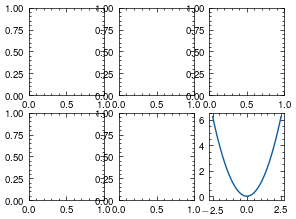

In [475]:
fig, axes = plt.subplots(nrows=2, ncols=3)

x0 = np.linspace(-2.5,2.5, 100)

plt.plot(x0, x0**2)
plt.show()

## Figure 1

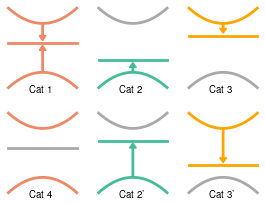

In [130]:
fig, axes = plt.subplots(nrows=2, ncols=3)
x0 = np.linspace(0, 5, 100)
hyperbola = 0.1*(x0-2.5)**2
ax = axes[0][0]
ax.plot(x0, hyperbola+2, color="#EE8866", linewidth=2)
ax.plot(x0, -hyperbola, color="#EE8866", linewidth=2)
# axes[0].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [1.2 for i in x0], linestyle="-", color="#EE8866", linewidth=2)
ax.text(1.5, -0.8, "Cat 1", )
ax.arrow(2.5, 0, 0, 0.9, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="#EE8866")
ax.arrow(2.5, 2, 0, -0.5, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="#EE8866")
ax.axis("off")

ax = axes[0][1]
ax.plot(x0, hyperbola+2, color="darkgrey", linewidth=2)
ax.plot(x0, -hyperbola, color="#44BB99", linewidth=2)
# axes[1].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [0.5 for i in x0], linestyle="-", color="#44BB99", linewidth=2)
ax.text(1.5, -0.8, "Cat 2", )
ax.arrow(2.5, 0, 0, 0.2, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="#44BB99")
ax.axis("off")

ax = axes[0][2]
ax.plot(x0, hyperbola+2, color="orange", linewidth=2)
ax.plot(x0, -hyperbola, color="darkgrey", linewidth=2)
# axes[2].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [1.5 for i in x0], linestyle="-", color="orange", linewidth=2)
ax.text(1.5, -0.8, "Cat 3", )
ax.arrow(2.5, 2, 0, -0.2, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="orange")
ax.axis("off")


# Not followed
ax = axes[1][0]
ax.plot(x0, hyperbola+2, color="#EE8866", linewidth=2)
ax.plot(x0, -hyperbola, color="#EE8866", linewidth=2)
# axes[3].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [1.2 for i in x0], linestyle="-", color="darkgrey", linewidth=2)
ax.text(1.5, -0.8, "Cat 4", )
ax.axis("off")

ax = axes[1][1]
ax.plot(x0, hyperbola+2, color="darkgrey", linewidth=2)
ax.plot(x0, -hyperbola, color="#44BB99", linewidth=2)
# axes[1].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [1.5 for i in x0], linestyle="-", color="#44BB99", linewidth=2)
ax.text(1.5, -0.8, "Cat 2'", )
ax.arrow(2.5, 0, 0, 1.2, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="#44BB99")
ax.axis("off")

ax = axes[1][2]
ax.plot(x0, hyperbola+2, color="orange", linewidth=2)
ax.plot(x0, -hyperbola, color="darkgrey", linewidth=2)
# axes[2].plot(x0, [1 for i in x0], linestyle="--", color="grey", linewidth=1.5)
ax.plot(x0, [0.5 for i in x0], linestyle="-", color="orange", linewidth=2)
ax.text(1.5, -0.8, "Cat 3'", )
ax.arrow(2.5, 2, 0, -1.2, head_length=0.2, width=0.1, head_width=0.5, shape="full", color="orange")
ax.axis("off")

fig.savefig("figure 1.pdf")
plt.show()

## Figure 2

In [127]:
qubit_can_gp = qubit_candidate_df.groupby(["level_cat"]).agg({"task_id": ["count", "unique"]})
qubit_can_gp
cat1 = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == '1', "task_id"]
cat1p = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == "1'", "task_id"]


cat2 = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == '2', "task_id"]
cat2p = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == "2'", "task_id"]


cat3 = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == '3', "task_id"]
cat3p = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == "3'", "task_id"]


cat4p = qubit_candidate_df.loc[qubit_candidate_df["level_cat"] == "4", "task_id"]

29 56 42 23 1 13


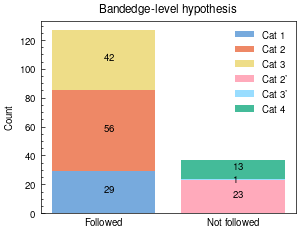

In [129]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
print(cat1.count(), cat2.count(), cat3.count(), cat2p.count(), cat3p.count(), cat4p.count())

ax.bar("Followed", cat1.count(), label="Cat 1")
ax.text(0, cat1.count()*0.5, cat1.count())
ax.bar("Followed", cat2.count(), bottom=cat1.count(), label="Cat 2")
ax.text(0, cat1.count()+cat2.count()*0.5, cat2.count())
ax.bar("Followed", cat3.count(), bottom=cat1.count()+cat2.count(), label="Cat 3")
ax.text(0, cat1.count()+cat2.count()+cat3.count()*0.5, cat3.count())


ax.bar("Not followed", cat2p.count(), label="Cat 2'")
ax.text(1, cat2p.count()*0.5, cat2p.count())
ax.bar("Not followed", cat3p.count(), bottom=cat2p.count(), label="Cat 3'")
ax.text(1, cat2p.count()-1.5, cat3p.count())
ax.bar("Not followed", cat4p.count(), bottom=cat2p.count()+cat3p.count(), label="Cat 4")
ax.text(1, cat2p.count()+cat3p.count()+cat4p.count()*0.5, cat4p.count())

ax.legend()
ax.set_ylabel("Count")
ax.set_title("Bandedge-level hypothesis")
ax.tick_params(which="both", bottom=False, top=False, right=False)



fig.savefig("figure 2.pdf")
plt.show()


## Figure 3

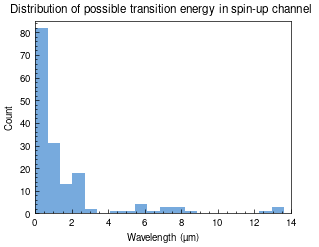

In [121]:
df = qubit_candidate_df.loc[:, "up_tran_wavelength"]
df = df.apply(lambda x: x/1000)
ax = df.plot.hist(bins=20)
ax.set_xlim((0, 14))
ax.set_ylim((0, 85))
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Count")
ax.set_title("Distribution of possible transition energy in spin-up channel")
plt.savefig("Figure 3_up.eps")
plt.show()


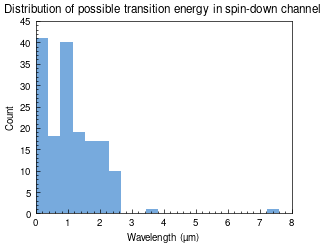

In [123]:
df = qubit_candidate_df.loc[:, "dn_tran_wavelength"]
df = df.apply(lambda x: x/1000)
ax = df.plot.hist(bins=20)
ax.set_xlim((0, 8))
ax.set_ylim((0, 45))
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Count")
ax.set_title("Distribution of possible transition energy in spin-down channel")
plt.savefig("Figure 3_dn.eps")
plt.show()

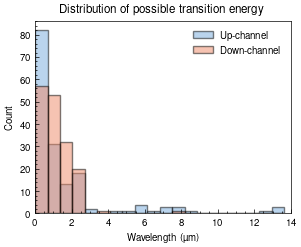

In [75]:
df = qubit_candidate_df.loc[:, ["up_tran_wavelength", "dn_tran_wavelength"]]
df["Up-channel"] = df["up_tran_wavelength"]
df["Down-channel"] = df["dn_tran_wavelength"]
df = df.loc[:, ["Up-channel", "Down-channel"]]

df = df.apply(lambda x: x/1000)
ax = df.plot.hist(bins=20, alpha=0.5, edgecolor="black")
ax.set_xlim((0, 14))
# ax.set_ylim((0, 45))
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Count")
ax.set_title("Distribution of possible transition energy")
plt.savefig("Figure 3.pdf")
plt.show()

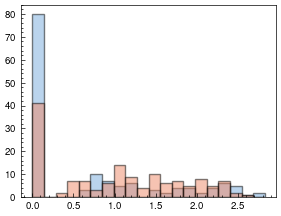

In [74]:
df = qubit_candidate_df.loc[:, ["up_tran_wavelength", "dn_tran_wavelength"]]
df["Up-channel"] = df["up_tran_wavelength"]
df["Down-channel"] = df["dn_tran_wavelength"]
df = df.loc[:, ["Up-channel", "Down-channel"]]

df = df.apply(lambda x: x/1000)
df = df.loc[(df["Up-channel"] <= 3) & (df["Down-channel"] <= 3)]

ax = df.plot.hist(bins=20, alpha=0.5, edgecolor="black")
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.get_legend().remove()
ax.set_ylabel("")
# ax.set_title("Distribution of possible transition energy")
plt.savefig("Figure 3_inset.pdf")
plt.show()

## Figure 4

In [32]:
from qubitPack.tool_box import get_db
db = get_db("HSE_triplets_from_Scan2dDefect", "zfs_data", port=12347)

In [84]:
es = db.collection.find()
data = []
for e in es:
    data_dict = {}
    data_dict["task_id"] = e["task_id"]
    data_dict["prev_fw_taskid"] = e["prev_fw_taskid"]
    data_dict["D/E"] = round(abs(e["pyzfs_out"]["D"])/abs(e["pyzfs_out"]["E"]), 2)
    data_dict["D"] = abs(e["pyzfs_out"]["D"])
    data_dict["E"] = abs(e["pyzfs_out"]["E"])
    
    data.append(data_dict)

df = pd.DataFrame(data)
df.loc[df["D/E"] < 5, :].count()

task_id           2
prev_fw_taskid    2
D/E               2
D                 2
E                 2
dtype: int64

117

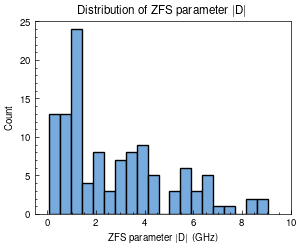

In [120]:
df1 = df.loc[df["D/E"]>=5, "D"]
df1 = df1.apply(lambda x: round(x/1000, 2))
display(df1.count())
ax = df1.plot.hist(bins=20, edgecolor="black")
ax.set_xlim((-0.5, 10))
ax.set_ylim((0, 25))
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.set_xlabel("ZFS parameter $\mathrm{|D|}$ (GHz)")
ax.set_ylabel("Count")
ax.set_title("Distribution of ZFS parameter "+"$\mathrm{|D|}$")
plt.savefig("figure 4.pdf")
plt.show()

94

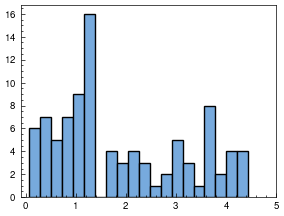

In [125]:
df1 = df.loc[df["D/E"]>=5, "D"]
df1 = df1.apply(lambda x: round(x/1000, 2))
df1 = df1.loc[df1 <= 5]
display(df1.count())
ax = df1.plot.hist(bins=20, edgecolor="black")
ax.tick_params(which="both", bottom=True, top=False, right=False)
ax.set_ylabel("")
ax.set_xlim((-0.1, 5))
plt.savefig("figure 4_inset.pdf")
plt.show()